In [1]:
import pandas as pd # Data analysis
import numpy as np # Scientific computing
import matplotlib.pyplot as plt # Plotting
import matplotlib.colors as colors # Coloring

In [2]:
def Volcano_plots(filename):
    
    #导入数据
    df = pd.read_csv(filename)
    result = pd.DataFrame()
    result['x'] = df['Difference']
    result['y'] = df['P.Value']
    result['name'] = df['Gene']
    result['sig'] = df['significant']


    #df
    
    #设置显著性阈值
    x_threshold=0
    y_threshold='+'



    #分组為up, normal, down
    result['group'] = 'black'
    result.loc[(result.x > x_threshold)&(result.sig == y_threshold),'group'] = 'tab:red' #x=-+x_threshold直接截断
    result.loc[(result.x < -x_threshold)&(result.sig == y_threshold),'group'] = 'tab:blue' #x=-+x_threshold直接截断
    result.loc[result.sig != y_threshold,'group'] = 'dimgrey' #阈值以下点为灰色
    #print(result.head())

    

    #确定坐标轴显示范围
    xmax = max(result['x'])
    ymax = max(result['y'])
    xmin = min(result['x'])
    ymin = min(result['y'])



    #繪製點狀圖(分布圖)
    fig = plt.figure(figsize=plt.figaspect(7/6)) #fig比例（h/w）
    ax_1 = fig.add_subplot()
    ax_1.set(xlim=(xmin, xmax), ylim=(ymin, ymax), title='vol')
    ax_1.scatter(result['x'], result['y'], s=2, c=result['group'])
    ax_1.set_ylabel('-Log(P-value)',fontweight='bold')
    ax_1.set_xlabel('Difference',fontweight='bold')
    ax_1.spines['right'].set_visible(False) #去掉右邊框
    ax_1.spines['top'].set_visible(False) #去掉上邊框

    
    
    i = 0
    texts = []
    for i in range(len(df)):
        if result['sig'][i] == '+':
            texts.append(ax_1.annotate(result['name'][i],(result['x'][i],result['y'][i])))
    print('顯著資料', len(texts))
    

    
    #水平和竖直线
    ax_1.vlines(0, ymin, ymax, color='dimgrey', linewidth=1) #画竖直线


    ax_1.set_xticks(range(int(xmin),int(xmax))) #設置x軸刻度
    ax_1.set_yticks(range(int(ymin),int(ymax))) #設置y軸刻度



    plt.show()

In [3]:
import tkinter as tk
from tkinter import filedialog



def uploadAction(event=None):
    filename = filedialog.askopenfilename()
    Volcano_plots(filename)

顯著資料 142


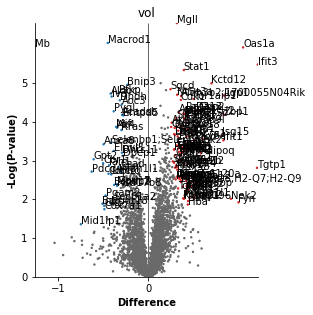

In [4]:
root = tk.Tk()



btn_select = tk.Button(root, text='Selete file', command=uploadAction)
btn_select.pack()



root.mainloop()